# Analysis of SDPD Traffic Stops by Race

In [2]:
from pyforest import *

In [3]:
# reason for stop data
path = r'../policeData/reasonForStop/ripa_stop_reason_datasd.csv'
stopReason = pd.read_csv(path, dtype={'stop_id': int,
                              'reason_for_stop': 'str',
                             'reason_for_stopcode': 'str',
                             'reason_for_stopcode_text': 'str',
                             'reason_for_stop_detail': 'str',
                             'reason_for_stop_explanation': 'str'})

<IPython.core.display.Javascript object>

In [33]:
# race data
path = r'../policeData/raceOfPersons/ripa_race_datasd.csv'
race = pd.read_csv(path, dtype={'stop_id': int,
                              'pid': 'str',
                             'race': 'str'})

<IPython.core.display.Javascript object>

In [30]:
display(stopReason, race)

,stop_id,pid,reason_for_stop,reason_for_stopcode,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation
0,2443,1,Reasonable Suspicion,64005,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,Officer witnessed commission of a crime,"staggering, unable to safely walk"
1,2444,1,Traffic Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding
2,2447,1,Reasonable Suspicion,53072,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.
3,2447,2,Reasonable Suspicion,53072,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.
4,2448,1,Traffic Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING
...,...,...,...,...,...,...,...
366825,324712,1,Investigation to determine whether the person ...,NaN,NaN,NaN,call for service regarding setting off fireworks
366826,324712,2,Investigation to determine whether the person ...,NaN,NaN,NaN,call for service regarding setting off fireworks
366827,324712,3,Investigation to determine whether the person ...,NaN,NaN,NaN,call for service regarding setting off fireworks
366828,324715,1,Traffic Violation,54181.0,21755 VC - USE SHOLDER/ETC:PAS RIGHT (I) 54181,Moving Violation,drive on right shoulder


,stop_id,pid,race
0,2443,1,White
1,2444,1,White
2,2447,1,Hispanic/Latino/a
3,2447,2,Hispanic/Latino/a
4,2448,1,White
...,...,...,...
359630,324712,1,Hispanic/Latino/a
359631,324712,2,Hispanic/Latino/a
359632,324712,3,Hispanic/Latino/a
359633,324715,1,Hispanic/Latino/a


In [37]:
# join on stop_id

merged = pd.merge(stopReason, race, on = 'stop_id')

<IPython.core.display.Javascript object>

In [38]:
display(merged)

,stop_id,pid_x,reason_for_stop,reason_for_stopcode,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,pid_y,race
0,2443,1,Reasonable Suspicion,64005,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,Officer witnessed commission of a crime,"staggering, unable to safely walk",1,White
1,2444,1,Traffic Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding,1,White
2,2447,1,Reasonable Suspicion,53072,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,1,Hispanic/Latino/a
3,2447,1,Reasonable Suspicion,53072,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,2,Hispanic/Latino/a
4,2447,2,Reasonable Suspicion,53072,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.,1,Hispanic/Latino/a
...,...,...,...,...,...,...,...,...,...
555650,324712,3,Investigation to determine whether the person ...,NaN,NaN,NaN,call for service regarding setting off fireworks,1,Hispanic/Latino/a
555651,324712,3,Investigation to determine whether the person ...,NaN,NaN,NaN,call for service regarding setting off fireworks,2,Hispanic/Latino/a
555652,324712,3,Investigation to determine whether the person ...,NaN,NaN,NaN,call for service regarding setting off fireworks,3,Hispanic/Latino/a
555653,324715,1,Traffic Violation,54181.0,21755 VC - USE SHOLDER/ETC:PAS RIGHT (I) 54181,Moving Violation,drive on right shoulder,1,Hispanic/Latino/a


In [80]:
from collections import Counter
values = merged.race
counts = Counter(values)
 
sorted = pd.DataFrame(counts.most_common(), columns = ['race', 'stops'])
sorted

<IPython.core.display.Javascript object>

,race,stops
0,White,246561
1,Hispanic/Latino/a,154003
2,Black/African American,111655
3,Asian,23452
4,Middle Eastern or South Asian,13431
5,Pacific Islander,5080
6,Native American,1473


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

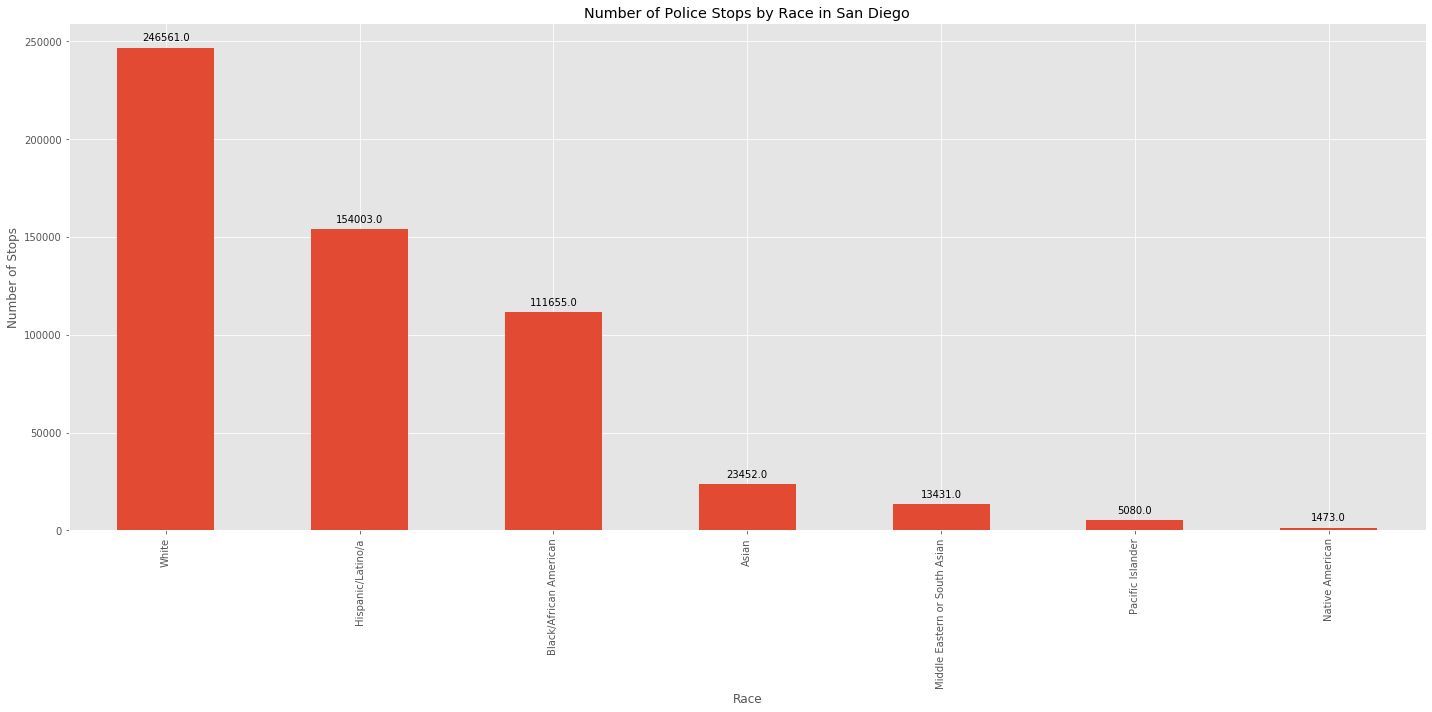

In [111]:
stops = pd.Series(sorted.stops)
labels = pd.Series(sorted.race)

plt.style.use('ggplot')

plt.figure(figsize =(20,10))
ax = stops.plot(kind='bar')
ax.set_xlabel('Race')
ax.set_ylabel('Number of Stops')
ax.set_title('Number of Police Stops by Race in San Diego')
ax.set_xticklabels(labels)

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

#make sure nothing cut off
plt.tight_layout()

plt.savefig("stopsByRace.png")


# Population Statistics for San Diego City - July 1, 2019*

Total Population: 1,423,851

### Racial Distribution

White: 42.9%

Hispanic or Latino: 30.1%

Asian: 16.7%

Black or African American: 6.5%

American Indian and Alaska Native: 0.4%

Native Hawaiian and Pacific Islander: 0.4%

*https://www.census.gov/quickfacts/fact/table/sandiegocountycalifornia,CA/PST045219


# Stop Statistics for San Diego City from July 1, 2018*

Total Stops: 555655

### Racial Distrution

White: 246561 (44.37%)

Hispanic/Latino: 154003 (27.71%)

Black/African American: 111655 (20%)

Asian: 23452 (4.22%)

Middle Eastern or South Asian: 13431 (2.42%)

Pacific Islander: 5080 (0.91%)

Native American: 1473 (0.03%)

*https://data.sandiego.gov/datasets/police-ripa-stops/